## Exploratory Analysis using Jupyter Notebook
For further reading, we recommend: 
- [the pandas documentation](http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#getting)  for information about using DataFrames
- [this blog post](https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed) for a jumpstart into visualizations
- [the matplotlib documentation](https://matplotlib.org/users/pyplot_tutorial.html) for more info about visualizations

In [1]:
import pandas as pd

#### Loading data from our GPC bucket

In [2]:
import s3fs
s3 = s3fs.S3FileSystem(anon=True)
s3.ls('twde-datalab/raw')

s3.get('twde-datalab/raw/quito_stores_sample2016-2017.csv', 
       '../data/quito_stores_sample2016-2017.csv')

In [41]:
s3.get('twde-datalab/raw/items.csv', 
       '../data/items.csv')

In [42]:
items = pd.read_csv('../data/items.csv')

In [43]:
items.sample

<bound method NDFrame.sample of       item_nbr            family  class  perishable
0        96995         GROCERY I   1093           0
1        99197         GROCERY I   1067           0
2       103501          CLEANING   3008           0
3       103520         GROCERY I   1028           0
4       103665      BREAD/BAKERY   2712           1
5       105574         GROCERY I   1045           0
6       105575         GROCERY I   1045           0
7       105576         GROCERY I   1045           0
8       105577         GROCERY I   1045           0
9       105693         GROCERY I   1034           0
10      105737         GROCERY I   1044           0
11      105857         GROCERY I   1092           0
12      106716         GROCERY I   1032           0
13      108079         GROCERY I   1030           0
14      108634         GROCERY I   1075           0
15      108696              DELI   2636           1
16      108698              DELI   2644           1
17      108701              DELI

In [3]:
train = pd.read_csv('../data/quito_stores_sample2016-2017.csv')

In [4]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,cluster
0,88211471,2016-08-16,44,103520,7.0,True,Quito,Pichincha,5
1,88211472,2016-08-16,44,103665,7.0,False,Quito,Pichincha,5
2,88211473,2016-08-16,44,105574,13.0,False,Quito,Pichincha,5
3,88211474,2016-08-16,44,105575,18.0,False,Quito,Pichincha,5
4,88211475,2016-08-16,44,105577,8.0,False,Quito,Pichincha,5


#### With just this glimpse, you can start to fill out your list of assumptions, hypotheses, and questions. Some of mine are:
- Question: What is the span of dates we are provided?
- Question: How many distinct store_nbr values are there?
- Question: How many distinct item_nbr values are there?
- Hypothesis: unit_sales are always positive
- Hypothesis: onpromotion is always either True or False
- Hypothesis: city and state are always going to be Quito and Pichincha
- Hypothesis: cluster is always 5
- Question: What does cluster mean and is it important to know?
- Question: How many records does the data contain?
- Question: What other data files are available?

In [5]:
train.describe()

,id,store_nbr,item_nbr,unit_sales,cluster
count,5.877318e+06,5.877318e+06,5.877318e+06,5.877318e+06,5.877318e+06
mean,1.066164e+08,4.646462e+01,1.166542e+06,1.384925e+01,1.143455e+01
std,1.081675e+07,1.713651e+00,5.726114e+05,3.087377e+01,3.229972e+00
min,8.821147e+07,4.400000e+01,9.699500e+04,-2.900000e+02,5.000000e+00
25%,9.720613e+07,4.500000e+01,7.243600e+05,3.000000e+00,1.100000e+01
50%,1.064948e+08,4.600000e+01,1.228319e+06,7.000000e+00,1.100000e+01
75%,1.159730e+08,4.800000e+01,1.502392e+06,1.400000e+01,1.400000e+01
max,1.254869e+08,4.900000e+01,2.127114e+06,6.932000e+03,1.400000e+01


In [8]:
data = train

### Here's some examples of how to address those first questions

In [7]:
# Access an entire dataframe column like you would
# the value in a python dictionary:
# (The returned object has similar pandas built-in 
# functions, like 'head' and 'max')
print(train['date'].min())
print(train['date'].max())

2016-08-16
2017-08-15


In [9]:
# Dataframe columns also have a 'unique' method,
# which can answer several of our questions from above
data['store_nbr'].unique()

array([44, 45, 46, 47, 48, 49])

In [10]:
print(data['item_nbr'].unique())
print("There are too many item numbers to display, so let's just count them for now:")
print("\n{} different item_nbr values in our data"
          .format(len(data['item_nbr'].unique())))

[ 103520  103665  105574 ... 2011468 2011448 2123839]
There are too many item numbers to display, so let's just count them for now:

3717 different item_nbr values in our data


#### It might be helpful to know the 'shape' of our data. We could count by hand (for now) the columns, but how many rows do we have altogether?

In [11]:
print(data.shape)
print("There are {} rows and {} columns in our data".format(data.shape[0], data.shape[1]))

(5877318, 9)
There are 5877318 rows and 9 columns in our data


In [13]:
print(data['onpromotion'].unique())

[ True False]


#### Moving along to answer our intial questions... Let's have a look at unit_sales. Keep in mind that unit sales is the variable we want to predict with our science.

Each row in our data is essentially telling us a `unit_sales` number for a given `item_nbr` at a given `store_nbr` on a given `date`. That is, "how many of an item was sold at a store on a day".

In [14]:
train.columns

Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion',
       'city', 'state', 'cluster'],
      dtype='object')

In [15]:
print(data['cluster'].unique())

[ 5 11 14]


In [16]:
print(data['state'].unique())

['Pichincha']


In [17]:
stores = data['store_nbr'].unique()

In [44]:
data.index = pd.to_datetime(data.date)

In [62]:
import IPython.display
import matplotlib.pyplot as plt

store 44
count    1.014154e+06
mean     1.677606e+01
std      3.737943e+01
min     -1.870000e+02
25%      3.000000e+00
50%      8.000000e+00
75%      1.700000e+01
max      3.556000e+03
Name: unit_sales, dtype: float64
store 45
count    1.006279e+06
mean     1.530840e+01
std      3.257640e+01
min     -2.000000e+02
25%      3.000000e+00
50%      8.000000e+00
75%      1.600000e+01
max      4.023000e+03
Name: unit_sales, dtype: float64
store 46
count    964234.000000
mean         11.885464
std          29.754508
min        -290.000000
25%           3.000000
50%           6.000000
75%          12.000000
max        5355.000000
Name: unit_sales, dtype: float64
store 47
count    997231.000000
mean         14.463301
std          31.380441
min        -110.000000
25%           3.000000
50%           7.000000
75%          15.000000
max        6932.000000
Name: unit_sales, dtype: float64
store 48
count    918163.000000
mean         10.414309
std          23.208984
min        -175.000000
25%        

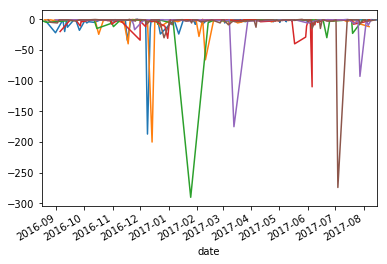

In [69]:
p = None
for store in stores:
    filt = data['store_nbr']==store
    s = data[filt]
    field = 'unit_sales'
    print("store", store)
    print(s[field].describe())
    #x = s[s.unit_sales < 0]
    #print(s.head)
    #p = s[s.unit_sales < 0].unit_sales.resample('W').median().plot(x='index',y='unit_sales')
    p = s[s.unit_sales < 0].unit_sales.plot(x='index',y='unit_sales')
    #p = s[s.unit_sales < 0].unit_sales.median().plot(x='index',y='unit_sales')
    
plt.show()